import libraries

In [35]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

## Preprocess
Preprocess the data by subtracting the mean and dividing by the standard deviation of each attribute value. The resulting data should be zero-mean with variance 1

In [ ]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\iris.data')
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
X = (X - X.mean())/X.std()
X

In [36]:
mean = X.mean().to_frame().rename(columns={0:'Mean Value'})
mean

,Mean Value
sepal_length,-1.457168e-15
sepal_width,-1.722511e-15
petal_length,-2.043551e-15
petal_width,-9.843977e-17


In [37]:
var = X.var().to_frame().rename(columns={0:'Variance'})
var

,Variance
sepal_length,1.0
sepal_width,1.0
petal_length,1.0
petal_width,1.0


## Compute the covariance matrix
where m is the sample size and x^(i) is the ith instance.

In [38]:
covariance_matrix = X.cov()
covariance_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


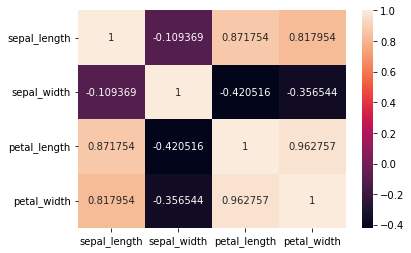

In [39]:
labs=['sepal_length','sepal_width','petal_length','petal_width']
sn.heatmap(covariance_matrix, annot=True, fmt='g', xticklabels=labs, yticklabels=labs,)
plt.show()

## Factorize the covariance matrix  using SVD
Factorize the covariance matrix using singular value decomposition (SVD) and obtain the eigenvalues and eigenvectors. The SVD of a matrix Σ is a factorization of the form.

Σ = USV

For symmetric, positive definite matrices U = V^T contains the eigenvectors and S is a diagonal matrix containing the respective eigenvalues.

In [41]:
from scipy.linalg import svd
U, S, V = np.linalg.svd(covariance_matrix.to_numpy())

In [42]:
eigonValaues = pd.DataFrame(S)
eigonValaues.rename(columns={0:'Eigen Values'})


,Eigen Values
0,2.910818
1,0.921221
2,0.147353
3,0.020608


In [43]:
eigenVector = pd.DataFrame(U)
eigenVector

,0,1,2,3
0,-0.522372,-0.372318,0.721017,0.261996
1,0.263355,-0.925556,-0.242033,-0.124135
2,-0.581254,-0.021095,-0.140892,-0.801154
3,-0.565611,-0.065416,-0.633801,0.523546


## Project the data onto its first two principal components and plot the results.

In [44]:
PC_1 = V[:][:2]
PC_1

array([[-0.52237162,  0.26335492, -0.58125401, -0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577]])

In [45]:
Z_1 = np.matmul(X,U[:,0:2])


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

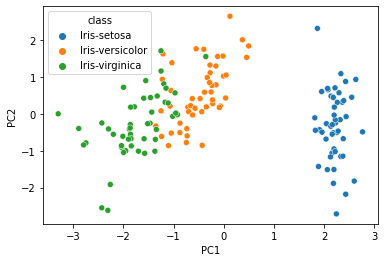

In [46]:
plt.xlabel("PC1")
plt.ylabel("PC2")
sn.scatterplot(Z_1[0], Z_1[1], hue=df['class'])

## PCA implementation at Scikit-learn (sklearn.decomposition.PCA) 

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
(pca.components_)

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [48]:
pca_components = pd.DataFrame(pca.components_)
pca_components

,0,1,2,3
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

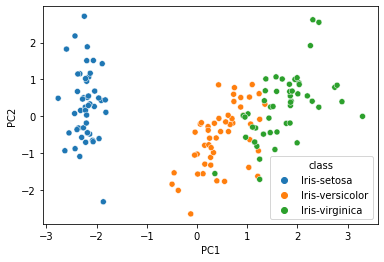

In [49]:
Z_2 = pca.fit_transform(X)
plt.xlabel("PC1")
plt.ylabel("PC2")
sn.scatterplot(Z_2[:, 0], Z_2[:, 1], hue=df['class'])